# Using the Pseudoinverse for Parabolic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../fonts')
from set_font import set_font

In [2]:
data = np.array([[2, 3],
                 [6, 8],
                 [8, 6],
                 [10, 2]])

## Part 1: Define the Base Functions
The base functions are defined as follows:

\begin{equation*}
    h_1(x) = 1, \quad h_2(x) = x \quad \text{and} \quad h_3(x) = x^2.
\end{equation*}

In [3]:
h1 = lambda x: np.ones(len(x))
h2 = lambda x: np.asarray(x)
h3 = lambda x: np.asarray(x)**2

## Part 2: Set Up the Matrix $H$
In order to solve the linear system $H\boldsymbol{w} = \boldsymbol{y}$, we need to set up the matrix $H$. Each row in this matrix corresponds to a data point (first component) and in the columns, we apply the corresponding base functions to the data points:

\begin{equation*}
    H = 
    \begin{pmatrix}
        h_1(2) & h_2(2) & h_3(2) \\
        h_1(6) & h_2(6) & h_3(6) \\
        h_1(8) & h_2(8) & h_3(8) \\
        h_1(10) & h_2(10) & h_3(10)
    \end{pmatrix}
\end{equation*}

In [4]:
H = np.stack([h1(data[:, 0]), h2(data[:, 0]), h3(data[:, 0])], axis=1)
H

array([[  1.,   2.,   4.],
       [  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.]])

## Part 3: Solve the System

In [5]:
weights = np.matmul(np.linalg.pinv(H), data[:, 1])
weights

array([-3.4       ,  3.88409091, -0.33522727])

## Part 4: Error

In [6]:
error = np.linalg.norm(data[:, 1] - np.matmul(H, weights))**2
error

0.08181818181818153

## Part 5: Plot the Result

In [7]:
def func_reg(x):
    H = np.array([h1(x), h2(x), h3(x)]).transpose()
    
    return np.matmul(H, weights)

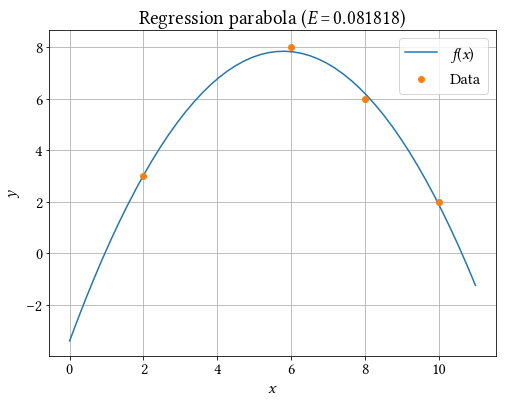

In [8]:
set_font()
plt.figure(figsize=(8, 6))
x = np.linspace(0, 11)
plt.plot(x, func_reg(x), label='$f(x)$')
plt.scatter(data[:, 0], data[:, 1], c='C1', zorder=3, label='Data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Regression parabola ($E = %f$)' % error)
plt.grid()
plt.legend();
#plt.savefig('../assignment11/figures/RegressionParabola.pdf', bbox_inches='tight')

## Part 6: When to Use $X^+$
It is possible to use the pseudoinverse for functions $f_1(x), f_2(x)$ and $f_4(x_1, x_2)$ since these are linear combinations of base functions without parameters. On the other hand, it is not possible to find a direct solution for $f_3(x)$ and $f_5(x_1, x_2)$ since in both cases the weights appear as parameters of the function and hence require base functions $h_{c_i}(x)$ with learnable parameters.

In [9]:
sol_vars = ['H', 'weights', 'error']